<a href="https://colab.research.google.com/github/yumoylmz/Pytorch-NN/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [40]:
# Create Model Class that inherits nn.module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8,h2=9,out_features = 3):
    super().__init__()  # instantiate our nn.module
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [4]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [7]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [8]:
# Change last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa',0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor',1.0)
my_df['variety'] = my_df['variety'].replace('Virginica',2.0)
my_df

<ipython-input-8-0322d7f032e8>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica',2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
# Train Test Split! Set X,y
X = my_df.drop('variety',axis=1)
y = my_df['variety']

In [10]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [11]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Train Test Split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [15]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [16]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [17]:
# Set the criterion of model to measure the error ,how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer lr = learning rate (if error doesnt't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [18]:
# Train our model
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error,gonna be high at first
  loss = criterion(y_pred, y_train)

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'epoch: {i} and loss: {loss}')

  # Do some propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


epoch: 0 and loss: 1.125203251838684
epoch: 10 and loss: 1.1094931364059448
epoch: 20 and loss: 1.0956722497940063
epoch: 30 and loss: 1.0833452939987183
epoch: 40 and loss: 1.0711157321929932
epoch: 50 and loss: 1.0581969022750854
epoch: 60 and loss: 1.0440173149108887
epoch: 70 and loss: 1.027978539466858
epoch: 80 and loss: 1.0061289072036743
epoch: 90 and loss: 0.9843640923500061


Text(0.5, 0, 'Epoch')

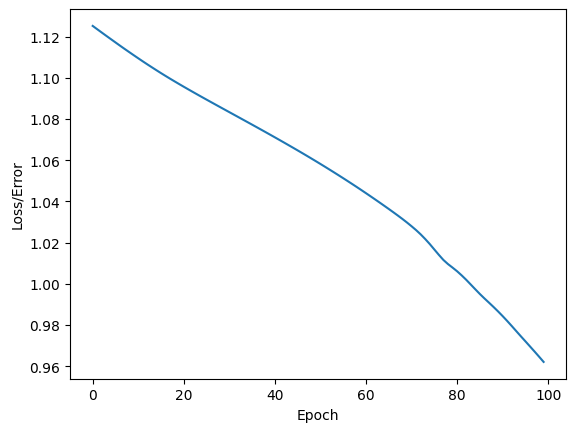

In [19]:
# Graph it out!
plt.plot(range(epochs),losses)
plt.ylabel("Loss/Error")
plt.xlabel("Epoch")

In [20]:
# Evaluate Model on Test Data Set (Validate model on test)
with torch.no_grad():  # Basically turn off back propagation
   y_eval = model.forward(X_test)  # X_test are features from our test set , y_eval will be predictions
   loss = criterion(y_eval,y_test) # Find the loss or error


In [21]:
loss

tensor(0.9680)

In [34]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = "Versicolor"
    else:
      x = "Virginica"

    # Will tell us what type of flower class our network things it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}' )

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'We got {correct} correct!')


1.) tensor([0.1251, 0.2597, 0.5080]) 	 2 	 2
2.) tensor([0.0986, 0.2319, 0.6968]) 	 2 	 2
3.) tensor([0.0450, 0.2283, 0.8521]) 	 2 	 2
4.) tensor([0.1148, 0.2797, 0.4470]) 	 1 	 2
5.) tensor([0.0809, 0.2405, 0.7077]) 	 2 	 2
6.) tensor([0.1283, 0.2913, 0.3867]) 	 1 	 2
7.) tensor([0.1048, 0.2590, 0.5697]) 	 2 	 2
8.) tensor([0.1124, 0.2770, 0.4673]) 	 1 	 2
9.) tensor([0.0929, 0.2484, 0.6439]) 	 2 	 2
10.) tensor([0.0781, 0.2243, 0.7809]) 	 2 	 2
11.) tensor([0.1103, 0.2584, 0.5544]) 	 2 	 2
12.) tensor([0.3174, 0.2947, 0.0245]) 	 0 	 0
13.) tensor([ 0.3269,  0.3014, -0.0460]) 	 0 	 0
14.) tensor([0.1820, 0.3000, 0.2158]) 	 1 	 1
15.) tensor([0.2850, 0.2975, 0.0744]) 	 0 	 1
16.) tensor([0.1090, 0.2641, 0.5256]) 	 2 	 2
17.) tensor([0.3140, 0.2972, 0.0040]) 	 0 	 0
18.) tensor([0.1202, 0.2566, 0.5303]) 	 1 	 2
19.) tensor([ 0.3330,  0.2939, -0.0096]) 	 0 	 0
20.) tensor([ 0.3127,  0.3059, -0.0146]) 	 0 	 0
21.) tensor([0.1649, 0.2948, 0.2795]) 	 1 	 1
22.) tensor([0.0733, 0.2309, 0.768

In [28]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [30]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 0.3259,  0.2989, -0.0204])


In [32]:
newer_iris = torch.tensor([5.9,3.0,5.1,1.8])

In [33]:
with torch.no_grad():
  print(model(newer_iris))

tensor([0.1190, 0.2506, 0.5609])


In [35]:
# Save our NN Model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [36]:
# Load the Saved models
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))


<All keys matched successfully>

In [38]:
# Make Sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)